Kunskapskontroll 2

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

from sklearn.metrics import classification_report
from sklearn.datasets import fetch_openml

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

from sklearn.svm import LinearSVC
from sklearn.svm import SVC

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

Preparing and fetching dataset

In [2]:
mnist = fetch_openml('mnist_784', version = 1, cache = True, as_frame = False)

print(mnist.DESCR)

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [3]:
X = mnist["data"]
y = mnist["target"].astype(np.uint8)

EDA

In [4]:
print(f"Dataset Shape: {X.shape}, Labels Shape: {y.shape}")

Dataset Shape: (70000, 784), Labels Shape: (70000,)


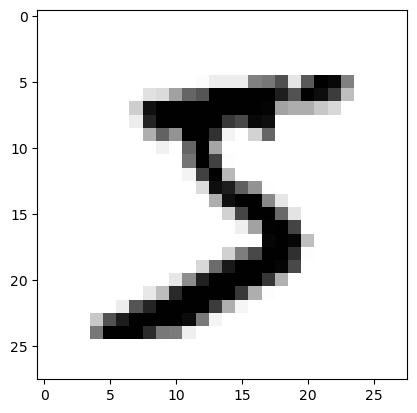

In [5]:
some_digit = X[0]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap=plt.get_cmap("binary"))

In [4]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42) 

In [8]:
log_reg = LogisticRegression(max_iter=2000, random_state=42)


In [ ]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.fit_transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [12]:
log_reg.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=2000, random_state=42)

In [13]:
y_pred = log_reg.predict(X_val_scaled)

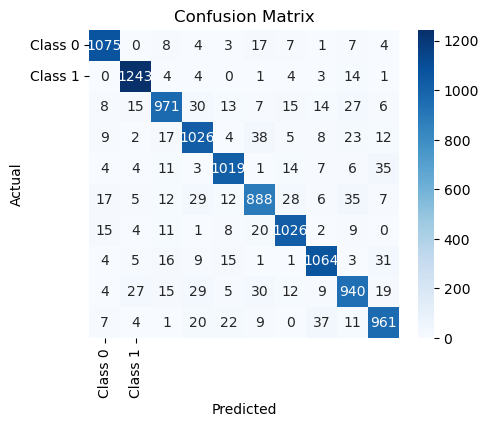

In [14]:
conf_matrix = confusion_matrix(y_val, y_pred)

plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [15]:
accuracy = accuracy_score(y_val, y_pred)
print(f'Accuracy: {accuracy:.4f}')

Accuracy: 0.9119


In [16]:
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.95      0.95      1126
           1       0.95      0.98      0.96      1274
           2       0.91      0.88      0.89      1106
           3       0.89      0.90      0.89      1144
           4       0.93      0.92      0.92      1104
           5       0.88      0.85      0.87      1039
           6       0.92      0.94      0.93      1096
           7       0.92      0.93      0.93      1149
           8       0.87      0.86      0.87      1090
           9       0.89      0.90      0.89      1072

    accuracy                           0.91     11200
   macro avg       0.91      0.91      0.91     11200
weighted avg       0.91      0.91      0.91     11200

